In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib inline

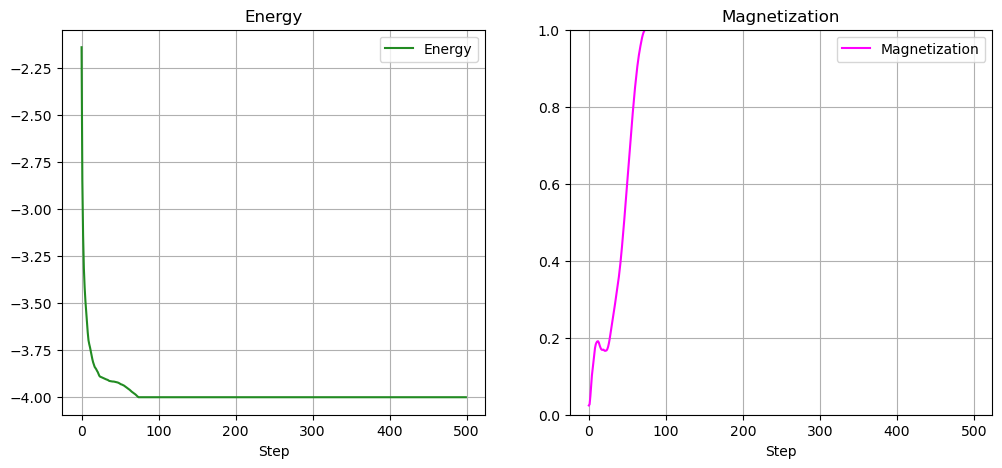

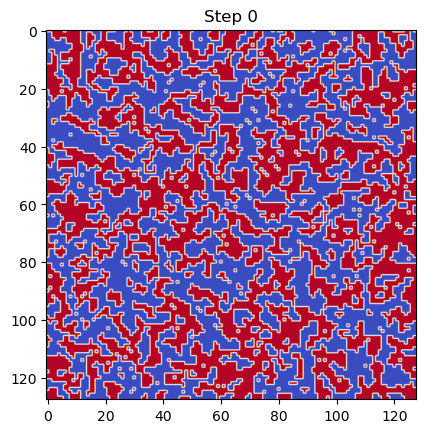

In [31]:

path = "OUTPUT.jade"

# write a function that reads the file and returns a list of 2D numpy arrays

def read_file(filename):
    steps = []
    with open(filename, 'r') as file:
        for line in file:
            arr = list(map(int, line.split()))
            steps.append(arr)
    return steps


steps = read_file(path)
N = int(np.sqrt(len(steps[0])))
steps_2D = [np.array(step).reshape(N, N) for step in steps]


# plot energy and magnetization
energy = np.loadtxt("energy_"+path, delimiter=" ")[:,1]
magnetization = np.loadtxt("magnetization_"+path, delimiter=" ")[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(energy, label='Energy', color='forestgreen')
ax1.set_title('Energy')
ax1.set_xlabel('Step')
ax1.grid()
ax1.legend()
ax2.plot(magnetization, label='Magnetization', color='magenta')
ax2.set_title('Magnetization')
ax2.set_xlabel('Step')
ax2.set_ylim(0, 1)
ax2.grid()
ax2.legend()
plt.show()


# animate the 2D grid
fig, ax = plt.subplots()
im = ax.imshow(steps_2D[0], cmap='coolwarm', interpolation=None, vmin=-1, vmax=1)

def update(frame):
    im.set_array(steps_2D[frame])
    ax.set_title(f"Step {frame}")

ani = animation.FuncAnimation(fig, update, frames=len(steps_2D), interval=200, repeat=True)

from IPython.display import HTML
HTML(ani.to_jshtml())


